### Библиотеки / данные

In [92]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import openpyxl
###  see 
### https://docs.scipy.org/doc/scipy/reference/stats.html

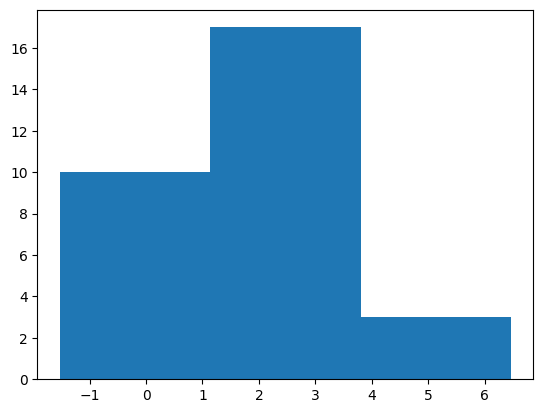

In [31]:
nn=30
a=1
sigma=2
####################
k_bins=3
X=np.random.normal(loc=a,scale=sigma,size=nn)
f_obs, bins, ignored = plt.hist(X,k_bins)

In [32]:
# Проверяем заведомо верную гипотезу H_0
# H_0: X ~ Normal distribution
# H_1: not H_0
############################################
# If pvalue>alpha => H_0 adopted
# If pvalue<=alpha => H_0 rejected and H_1 adopted

# замечательно работает с маленьники выборками а вот критерий 
# джарраБелла работает с выборками сильно больше 1000
rez = stats.shapiro(X)
print(rez)
# первое число - значение специальной св сконструированной для проверки 
# и получается только 
# только заточен на нормальное распределение 
# порядковые статистики внутри используются
# [p-value: чем ближе к 0 тем больше скорее подтверждается 0

# А.И. Кобварь Прикладная математическая статистика
# p-value минимальное значение альфа при который принимается H_0

ShapiroResult(statistic=0.9555454254150391, pvalue=0.23736132681369781)


In [37]:
# оценка риска получить ошибку первого рода
m = 5000
alpha = 0.01
count = 0
for i in range(m):
    x = np.random.normal(loc=a, scale=sigma, size=nn)
    res = stats.shapiro(x)
    if res[1] <= alpha:
        count += 1

print(count/m)

0.01


In [40]:
### Проверяем заведомо неверную гипотезу H_0 
for i in range(25):
    X=np.random.chisquare(df=i+1,size=nn)
    rez=stats.shapiro(X)
    print(rez.pvalue)

1.3361762285057921e-05
1.0387206650364078e-08
0.0060828435234725475
0.0015367850428447127
0.2479962259531021
0.028379332274198532
0.001785307889804244
0.0035507683642208576
0.010919871740043163
0.00013017511810176075
0.3928726017475128
0.15937957167625427
0.018914123997092247
0.8333405256271362
0.7121702432632446
0.21291077136993408
0.8459542393684387
0.016822662204504013
0.34014102816581726
0.0746259093284607
0.04814976453781128
0.3820376694202423
0.006967468652874231
0.0071103922091424465
0.6344928741455078


In [80]:
#оценка риска допустить ошибку 2 рода
df = 5
count_2 = 0
alpha = 0.01
m_2 = 1000
for i in range(m_2):
    x = np.random.chisquare(df=df, size=nn)
    res = stats.shapiro(x)
    if res[1] > alpha:
        count_2 += 1
print(f"{count_2/m_2}")

0.607


In [81]:
# проверка на normal test другой тест на нормальность
df = 5
count_2 = 0
alpha = 0.01
m_2 = 1000
for i in range(m_2):
    x = np.random.chisquare(df=df, size=nn)
    res = stats.normaltest(x)                      # diff is here
    if res[1] > alpha:
        count_2 += 1
print(f"{count_2/m_2}")

0.659


In [14]:
### Проверяем заведомо неверную гипотезу H_0 
### Скорректировать код самостоятельно для случай, когда
### X имеет равномерное распределение на интервале (0,1)
### Оценить вероятность избежать ошибки второго рода 
### при заданной ошибке первого рода alpha
for i in range(250):
    ### выполнить розыгрыш выборки из раномерно распределенной СВ  
    rez=stats.shapiro(X)
    print(rez.pvalue)

0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.0020650257356464863
0.00206502

In [44]:
################ READ from the file

In [88]:
import os
#os.listdir()

In [46]:
# print(os.getcwd())
# path="C:\\Users\\admin\\Downloads\\LABORATORKI"
# os.chdir(path)
# os.getcwd()
###os.listdir(path)

C:\Users\admin\Downloads\LABORATORKI


'C:\\Users\\admin\\Downloads\\LABORATORKI'

In [1]:
doc=pd.read_excel("lab3/example/PFO_doctors_2000_2018.xlsx",sheet_name='PFO')



NameError: name 'pd' is not defined

In [94]:
doc.head()

,год,Приволжский федеральный округ,Республика Татарстан,Оренбургская область,Самарская область,Саратовская область,Ульяновская область
0,2000,45.9,44.2,48.7,47.8,49.4,36.6
1,2001,45.7,44.1,49.0,47.2,49.3,36.9
2,2002,46.0,44.7,49.4,47.6,49.8,37.4
3,2003,46.3,45.4,50.0,47.7,50.2,35.9
4,2004,46.6,44.9,50.3,48.6,50.7,35.7


In [100]:
doc["Республика Татарстан"]

0     44.2
1     44.1
2     44.7
3     45.4
4     44.9
5     44.9
6     45.2
7     44.8
8     43.0
9     43.9
10    44.2
11    44.2
12    41.9
13    41.4
14    42.1
15    40.6
16    40.2
17    41.5
18    42.2
Name: Республика Татарстан, dtype: float64

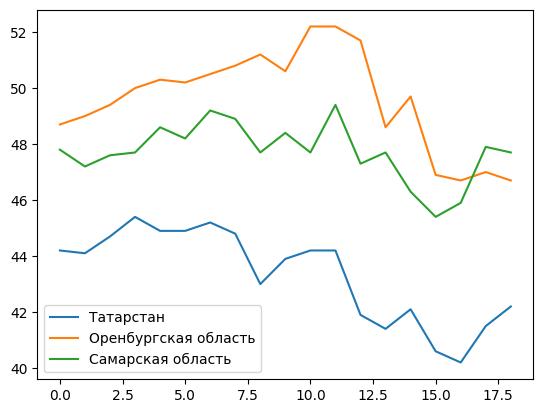

In [101]:
### Визуализация данных - графики
plt.plot(doc["Республика Татарстан"])
plt.plot(doc["Оренбургская область"])
plt.plot(doc["Самарская область"])
plt.legend(["Татарстан", "Оренбургская область","Самарская область"])

In [48]:
X_tatarstan=doc["Республика Татарстан"]
X_Samara=doc["Самарская область"]
X_Oren=doc["Оренбургская область"]
X_Saratov=doc["Саратовская область"]

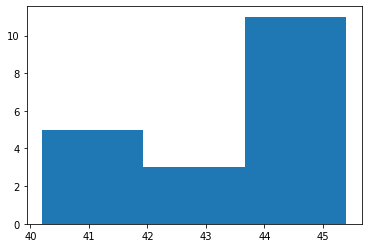

In [49]:
f_obs, bins, ignored = plt.hist(X_tatarstan,3)

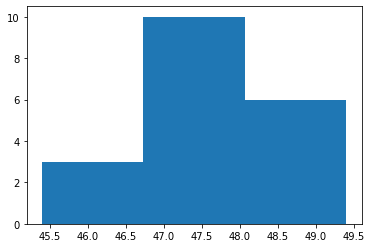

In [50]:
f_obs, bins, ignored = plt.hist(X_Samara,3)

In [52]:
rez=stats.shapiro(X_tatarstan)
print(rez)

ShapiroResult(statistic=0.9011173248291016, pvalue=0.05097231641411781)


In [53]:
rez=stats.shapiro(X_Samara)
print(rez)

ShapiroResult(statistic=0.9353136420249939, pvalue=0.21679607033729553)


In [54]:
rez=stats.shapiro(X_Oren)
print(rez)

ShapiroResult(statistic=0.9283690452575684, pvalue=0.16160203516483307)


In [55]:
rez=stats.shapiro(X_Saratov)
print(rez)

ShapiroResult(statistic=0.9335408210754395, pvalue=0.20119255781173706)


In [56]:
# проверка на равество дисперсий 
# он проверяет h_0 что дисперсия св х совпадает с 1 2 3 и 4
# альтернатива - что-то из этого не равно
res = stats.bartlett(X_tatarstan,X_Samara,X_Oren, X_Saratov)
res

BartlettResult(statistic=5.751812629750622, pvalue=0.12432960790851283)

In [57]:
print('alpha: ',alpha)
from scipy.stats import tukey_hsd
res = tukey_hsd(X_tatarstan,X_Samara,X_Oren, X_Saratov)
# тест тьюки требует, чтобы на раверство средних сравнивались не 
# любые выборки и нормально распределенные св
# иначе 
print(res)

alpha:  0.05
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -4.379     0.000    -5.716    -3.042
 (0 - 2)     -6.263    -0.000    -7.600    -4.926
 (0 - 3)     -7.874    -0.000    -9.211    -6.537
 (1 - 0)      4.379     0.000     3.042     5.716
 (1 - 2)     -1.884     0.002    -3.221    -0.547
 (1 - 3)     -3.495     0.000    -4.832    -2.158
 (2 - 0)      6.263    -0.000     4.926     7.600
 (2 - 1)      1.884     0.002     0.547     3.221
 (2 - 3)     -1.611     0.012    -2.948    -0.273
 (3 - 0)      7.874    -0.000     6.537     9.211
 (3 - 1)      3.495     0.000     2.158     4.832
 (3 - 2)      1.611     0.012     0.273     2.948



In [58]:
alpha=0.05
X_tatarstan=doc["Республика Татарстан"]
## print(X_tatarstan)
mean_tatarstan=np.mean(X_tatarstan)
std_tatarstan=np.std(X_tatarstan,ddof=1)
a_0=np.mean(doc["Приволжский федеральный округ"])
(mean_tatarstan,a_0,std_tatarstan)


(43.336842105263166, 46.473684210526315, 1.6533503111748542)

In [20]:
### H_0: M(X_tatarstan) = a_0
### H_1: M(X_tatarstan) < a_0
############################################
### If pvalue>alpha => H_0 adopted
### If pvalue<=alpha => H_0 rejected and H_1 adopted

n=len(X_tatarstan)
T_nabl=(mean_tatarstan-a_0)/std_tatarstan*math.sqrt(n)
p_value=stats.t.cdf(T_nabl,df=n-1)
print(T_nabl,p_value)

-8.26998225740159 7.613533966900695e-08


In [38]:
res=stats.ttest_1samp(X_tatarstan,popmean=a_0,alternative='less')
print(res)

Ttest_1sampResult(statistic=-8.26998225740159, pvalue=7.613533966900695e-08)


In [22]:
X_tatarstan=doc["Республика Татарстан"]
X_Samara=doc["Самарская область"]
(np.mean(X_tatarstan),np.mean(X_Samara))

(43.336842105263166, 47.715789473684204)

In [23]:
alpha=0.05
### H_0: M(X_tatarstan) = M(X_Samara)
### H_1: M(X_tatarstan) <  M(X_Samara)
############################################
### If pvalue>alpha => H_0 adopted
### If pvalue<=alpha => H_0 rejected and H_1 adopted
res=stats.ttest_ind(X_tatarstan,X_Samara,alternative='less')
print(res) 

Ttest_indResult(statistic=-9.799544639650781, pvalue=5.3205976761527e-12)


In [24]:
### H_0: M(X_Samara)= M(X_tatarstan) 
### H_1:  M(X_Samara) > M(X_tatarstan)
############################################
### If pvalue>alpha => H_0 adopted
### If pvalue<=alpha => H_0 rejected and H_1 adopted
alpha=0.05
res=stats.ttest_ind(X_Samara,X_tatarstan,alternative='greater')
print(res)

Ttest_indResult(statistic=9.799544639650781, pvalue=5.3205976761527e-12)


In [ ]:
###### THE END_05_11_2023 ###############